In [1]:
import json 
import numpy as np 
import pandas as pd 

In [2]:
pwd

'/app/timeseries/multiclass_src/notebooks'

# 1. Reading in from eval json

In [43]:
def load_eval_json(eval_file): 
    results_path = "/app/timeseries/multiclass_src/results/new_runs"
    output_file = eval_file
    fp = "/".join([results_path, output_file])
    with open(fp, "r+") as f: 
        results = json.load(f)
    return results 

In [45]:
af1_results = load_eval_json(eval_file="20201208_approxf1_eval.json")
ce_results = load_eval_json(eval_file="20201208_ce_eval.json")

In [46]:
def aggregate_runs(results_json): 
    '''Assuming each input is an array of JSONs that all have the same shape
    This aggregates an array of jsons together into a singular one, based on the set fields below
    '''
    eval_json = {}
    eval_taus = ['0.1', '0.2', '0.3', '0.4', '0.45', '0.5', '0.55', '0.6', '0.7', '0.8', '0.9']
    for tau in eval_taus: 
        eval_json[str(tau)] = {}
        eval_json[str(tau)]['mean_f1'] =  np.mean([x[str(tau)]['mean_f1'] for x in results_json])
        class_f1s = [x[str(tau)]['class_f1s'] for x in results_json]
        eval_json[str(tau)]['class_f1s'] = np.mean(class_f1s, axis=0)
        
        class_pr = [x[str(tau)]['class_precisions'] for x in results_json]
        eval_json[str(tau)]['class_precisions'] = np.mean(class_pr, axis=0)
        
        class_re = [x[str(tau)]['class_recalls'] for x in results_json]
        eval_json[str(tau)]['class_recalls'] = np.mean(class_re, axis=0)
    return eval_json 

In [47]:
af1_agg = aggregate_runs(af1_results)
ce_agg = aggregate_runs(ce_results)

In [48]:
af1_f1s = [af1_agg[x]['mean_f1'] for x in af1_agg]
ce_f1s = [ce_agg[x]['mean_f1'] for x in ce_agg]

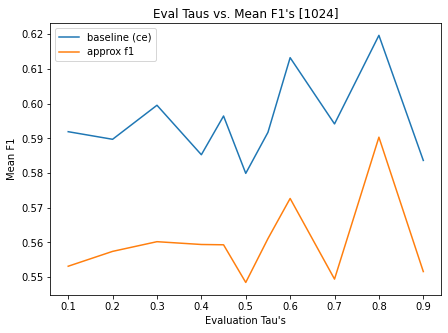

In [49]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_f1s, label="baseline (ce)")
plt.plot(taus, af1_f1s, label="approx f1")
plt.title("Eval Taus vs. Mean F1's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.legend()
plt.show()